# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(This is for Capstone project purposes)

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [33]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [34]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":2,"applicationTime":358,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [35]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [36]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":2,"applicationTime":358,"agent":""}
  </script>
  <script>
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-d


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [271]:
# First we find the right key and scraping using <table> that covered all the tables.
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


In [272]:
# Then we find the right key and scraping using <tr> that covered all the rows.
baris = table.find_all('tr')

In [273]:
# Get Data from column 'Date' for the first date
baris[1].find_all('th')[0].text

'2021-06-30'

In [274]:
# Get Data from column 'Volume' for the first volume
baris[1].find_all('td')[1].text

'\n$27,149,143,847\n'

Finding row length.

In [275]:
# Check how long is our list
row_length = len(baris)
row_length

548

Do the scrapping process here

- First we need to establish a placeholder to receive the information that we scrap.
- We named our placeholder temp and it's a list.
- Then we will make a loop from one until the the length of the table row,
- which we will find all cell of the column one and two which contain `Date` and the `Volume`.
- Then we will append it to our tuple that we prepared before,
- every one iteration we will scrap one line of the table.

In [276]:
temp = [] #initiating a tuple

for i in range(1,len(baris)):

    # Get Date
    Date = baris[i].th.text
    
    # Get Volume
    Volume = baris[i].find_all('td')[1].text.strip()
    
    # Data Append
    temp.append((Date,Volume))
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

In [277]:
# Reverse the data to become date older to latest

temp = temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Put the array into dataframe

In [327]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [328]:
df.dtypes

Date      object
Volume    object
dtype: object

Do the data cleaning here
- Change the datatype and remove unnecessary character 

In [329]:
# Change 'Date' datatype from Object to Datetime64
df['Date'] = df['Date'].astype('datetime64')

# Change 'Volume' datatype from object to int64 & remove simbol '$' and remove ','
df['Volume'] = df['Volume'].str.replace('$','').str.replace(',','').astype('int64')
df.dtypes

C:\Users\arnoa\AppData\Local\Temp/ipykernel_29920/2813951087.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace('$','').str.replace(',','').astype('int64')


Date      datetime64[ns]
Volume             int64
dtype: object

In [330]:
df.head()

,Date,Volume
0,2020-01-01,7103187151
1,2020-01-02,6623732041
2,2020-01-03,6497297884
3,2020-01-04,9655245100
4,2020-01-05,6958393690


Data visualisation
-  Now we need to setup our index, on this case we use `Date` for the time column index
-  After that we do some visualisation using .plot

In [331]:
df = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

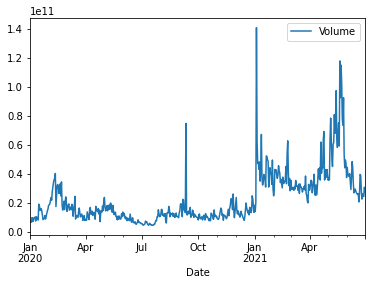

In [332]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

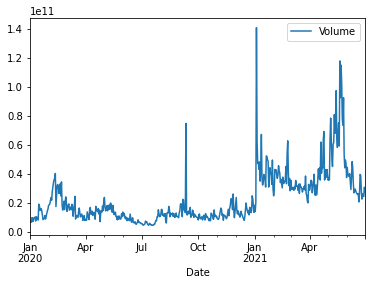

In [333]:
df.plot()

# Analysis
- from around april 2020 until mid of Sept 2020, Ethereum trading volume traffic tends to be stable in the range of 10 billion to 30 billion USD.
- there was a fairly high spike in ethereum trading around mid-September 2020. This spike did not last long.
- there was an Tremendous high spike in ethereum trading in early January 2021. But the spike did not last long.
- Based on records, there were 3 high spikes from Jan 2020 to June 2021, the last one occurred in mid-May 2021.
- Within 1.5 years, the trend of ethereum trading volume tends to increase.

# Conclusion
- Ethereum is a fairly stable cryptocurrency.
- Its trading volume also tends to increase, which is one sign that many people are interested in this cryptocurrency.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.